<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

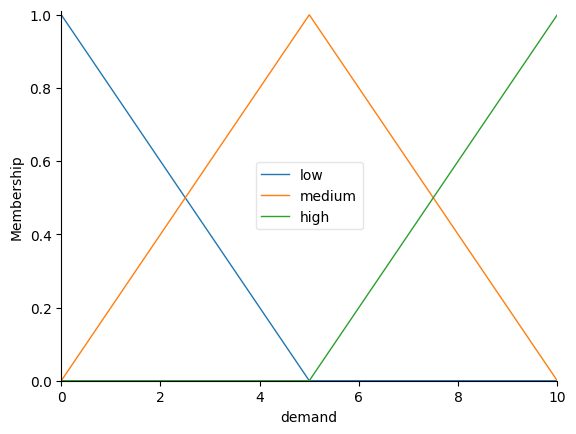

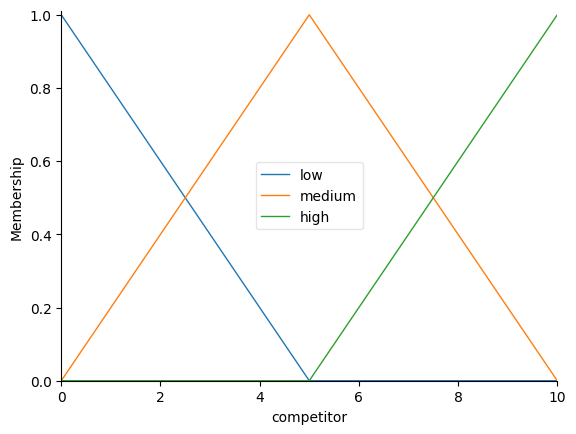

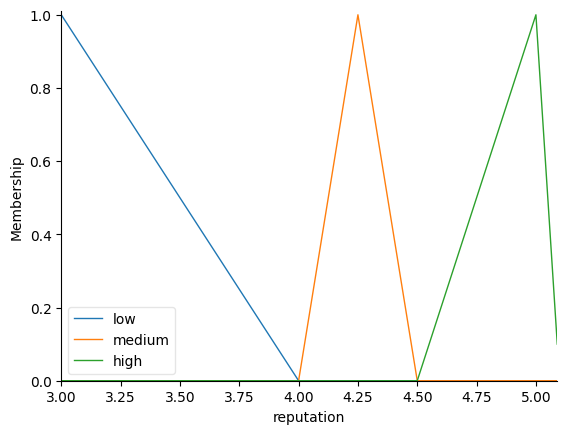

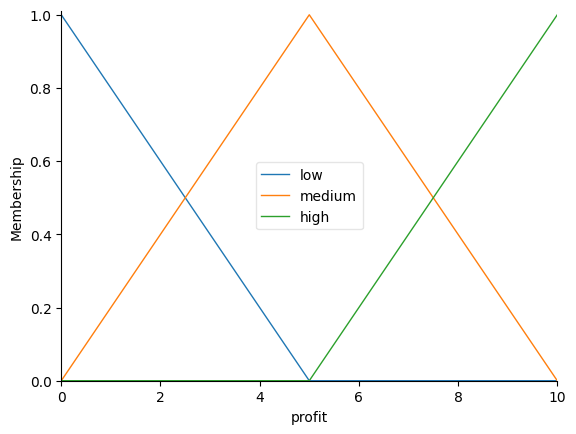

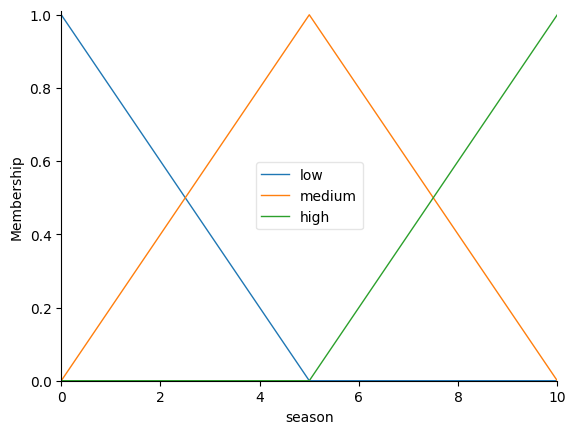

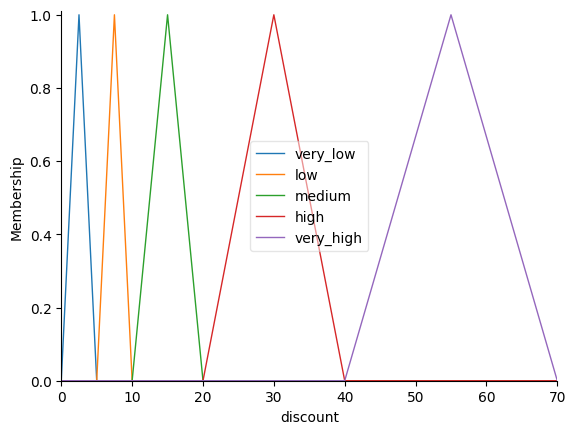

In [35]:
#T14 Chienluoc Pee
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand=ctrl.Antecedent(np.arange(0,10.1,0.1),'demand')
competitor=ctrl.Antecedent(np.arange(0,10.1,0.1),'competitor')
reputation=ctrl.Antecedent(np.arange(3,5.1,0.01),'reputation')
profit=ctrl.Antecedent(np.arange(0,10.1,0.1),'profit')
season=ctrl.Antecedent(np.arange(0,10.1,0.1),'season')
discount=ctrl.Consequent(np.arange(0,70.1,0.1),'discount')
demand['low']=fuzz.trimf(demand.universe,[0,0,5])
demand['medium']=fuzz.trimf(demand.universe,[0,5,10])
demand['high']=fuzz.trimf(demand.universe,[5,10,10])
competitor['low']=fuzz.trimf(competitor.universe,[0,0,5])
competitor['medium']=fuzz.trimf(competitor.universe,[0,5,10])
competitor['high']=fuzz.trimf(competitor.universe,[5,10,10])
reputation['low']=fuzz.trimf(reputation.universe,[3,3,4])
reputation['medium']=fuzz.trimf(reputation.universe,[4,4.25,4.5])
reputation['high']=fuzz.trimf(reputation.universe,[4.5,5,5.1])
profit['low']=fuzz.trimf(profit.universe,[0,0,5])
profit['medium']=fuzz.trimf(profit.universe,[0,5,10])
profit['high']=fuzz.trimf(profit.universe,[5,10,10])
season['low']=fuzz.trimf(season.universe,[0,0,5])
season['medium']=fuzz.trimf(season.universe,[0,5,10])
season['high']=fuzz.trimf(season.universe,[5,10,10])
discount['very_low']=fuzz.trimf(discount.universe,[0,2.5,5])
discount['low']=fuzz.trimf(discount.universe,[5,7.5,10])
discount['medium']=fuzz.trimf(discount.universe,[10,15,20])
discount['high']=fuzz.trimf(discount.universe,[20,30,40])
discount['very_high']=fuzz.trimf(discount.universe,[40,55,70])
demand.view()
competitor.view()
reputation.view()
profit.view()
season.view()
discount.view()

Discount: 24.259259259259395


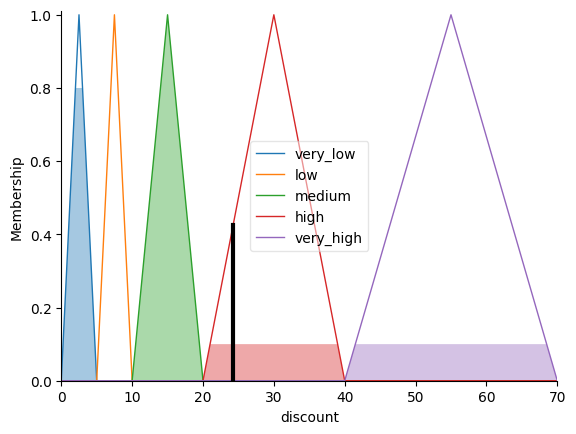

In [36]:
rule1=ctrl.Rule(demand['high']|competitor['low']|profit['low'],discount['very_low'])
rule2=ctrl.Rule(demand['low']|competitor['high']|profit['high'],discount['high'])
rule3=ctrl.Rule(reputation['high']|profit['medium']|season['high'],discount['medium'])
rule4=ctrl.Rule(season['high']|competitor['high']|profit['high'],discount['very_high'])
rule5=ctrl.Rule(reputation['low']|demand['medium']|profit['low'],discount['medium'])
rule6=ctrl.Rule(demand['high']|season['low']|competitor['low'],discount['very_low'])
rule7=ctrl.Rule(profit['high']|competitor['medium']|season['medium'],discount['medium'])
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
control_sim=ctrl.ControlSystemSimulation(control_system)
control_sim.input['demand']=9
control_sim.input['competitor']=5.5
control_sim.input['reputation']=4.2
control_sim.input['profit']=5
control_sim.input['season']=5
control_sim.compute()
print(f"Discount: {control_sim.output['discount']}")
discount.view(sim=control_sim)